<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Task 1`**

In [9]:
import pandas as pd
import numpy as np

In [73]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')

combined = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Q1) Preprocessing**

In [74]:
#From homework 1

from numpy.random import uniform

# Fill null in Fare to median
for df in combined:
  median_fare = df['Fare'].median()
  df['Fare'] = df['Fare'].fillna(median_fare)

for t in combined:
  train_fare = t["Fare"].tolist()

  for x in range(0, len(train_fare)):
    if t.at[t.index[x], 'Fare'] > -0.001 and t.at[t.index[x], 'Fare'] <= 7.91:
      t.at[t.index[x], 'Fare'] =  0
    elif t.at[t.index[x], 'Fare'] > 7.91 and t.at[t.index[x], 'Fare'] <= 14.454:
      t.at[t.index[x], 'Fare'] =  1
    elif t.at[t.index[x], 'Fare'] > 14.454 and t.at[t.index[x], 'Fare'] <= 31.0:
      t.at[t.index[x], 'Fare'] =  2
    elif t.at[t.index[x], 'Fare'] > 31.0 and t.at[t.index[x], 'Fare'] <= 512.329:
      t.at[t.index[x], 'Fare'] =  3  

# Fill null in embarked and make them numerical
embarked_to_num_map = {'S': 0, 'C': 1, 'Q': 2}
for df in combined:
  df['Embarked'] = df['Embarked'].fillna('S')
  df['Embarked'] = df['Embarked'].map(embarked_to_num_map)


# Change sex to numerical
sex_to_num_map = {'female': 1, 'male': 0}
for df in combined:
  df['Sex'] = df['Sex'].map(sex_to_num_map).astype(int)

# Adgust null in Age based on median and std
for df in combined:
  std_age = df['Age'].std()
  median_age = df['Age'].median() 
  df['Age'] = df['Age'].fillna(uniform(std_age, median_age))
  df.loc[ df['Age'] <= 15, 'Age'] = 0
  df.loc[(df['Age'] > 15) & (df['Age'] <= 30), 'Age'] = 1
  df.loc[(df['Age'] > 30) & (df['Age'] <= 45), 'Age'] = 2
  df.loc[(df['Age'] > 45) & (df['Age'] <= 60), 'Age'] = 3
  df.loc[ df['Age'] > 60, 'Age'] = 4  


train.head(10)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,1.0,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,3.0,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,1.0,NaN,0
5,6,0,3,"Moran, Mr. James",0,1.0,0,0,330877,1.0,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,3.0,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,2.0,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1.0,0,2,347742,1.0,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,2.0,NaN,1


**Q2) Feature selection**

Drop the feature that have very low correlation with survival. PassengerId, Name, Ticket, Cabin, SibSp columns will be dropped

In [77]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

train.head(10)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,0,1.0,0,0.0,0
1,1,1,1,2.0,0,3.0,1
2,1,3,1,1.0,0,1.0,0
3,1,1,1,2.0,0,3.0,0
4,0,3,0,2.0,0,1.0,0
5,0,3,0,1.0,0,1.0,2
6,0,1,0,3.0,0,3.0,0
7,0,3,0,0.0,1,2.0,0
8,1,3,1,1.0,2,1.0,0
9,1,2,1,0.0,0,2.0,1


**Q3)Decision tree using Gini index**

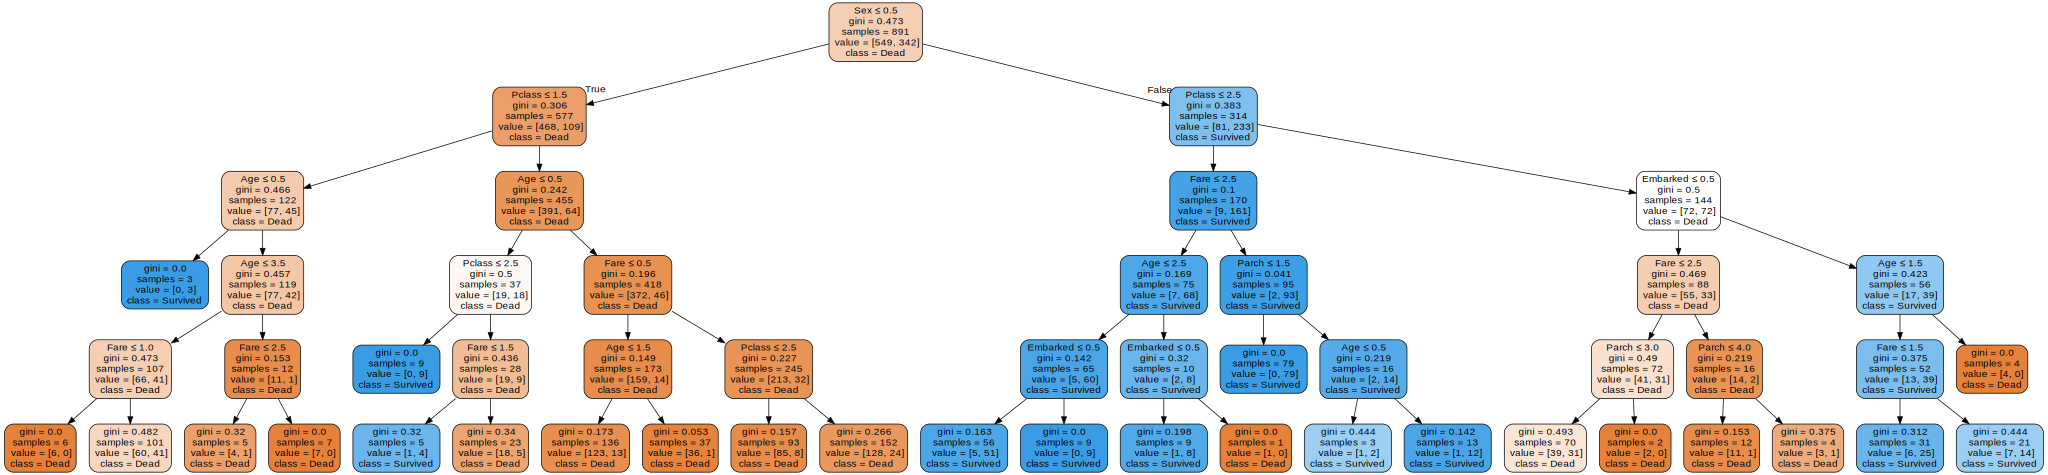

In [81]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features = ['Pclass', 'Sex', 'Age','Parch', 'Fare', 'Embarked']
classes = ['Dead', 'Survived']

y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values

decision_tree = tree.DecisionTreeClassifier(max_depth = 5)
decision_tree.fit(x_train, y_train)



data = export_graphviz(decision_tree, out_file=None,feature_names=features,class_names=classes,   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph



**Q4)Decision tree with cross validation**

In [92]:
from sklearn import tree
from sklearn.model_selection import cross_val_score



features = ['Pclass', 'Sex', 'Age','Parch', 'Fare', 'Embarked']
y_train = train[['Survived']]
x_train = train.drop(['Survived'], axis=1)

decision_tree = tree.DecisionTreeClassifier(max_depth=5)

scores = cross_val_score(estimator=decision_tree, X=x_train, y=y_train, cv=5)

scores.mean()


0.7957190383528968

**Q5)Random forest with cross validation**

In [95]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV


features = ['Pclass', 'Sex', 'Age','Parch', 'Fare', 'Embarked']
y_train = train[['Survived']]
x_train = train.drop(['Survived'], axis=1)
parameters = {'max_depth':range(3,20)}

decision_tree = GridSearchCV(tree.DecisionTreeClassifier(), parameters)
decision_tree.fit(X=x_train, y=y_train)

tree_model = decision_tree.best_estimator_
print (decision_tree.best_score_, decision_tree.best_params_)


0.8193019898311469 {'max_depth': 9}
